In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

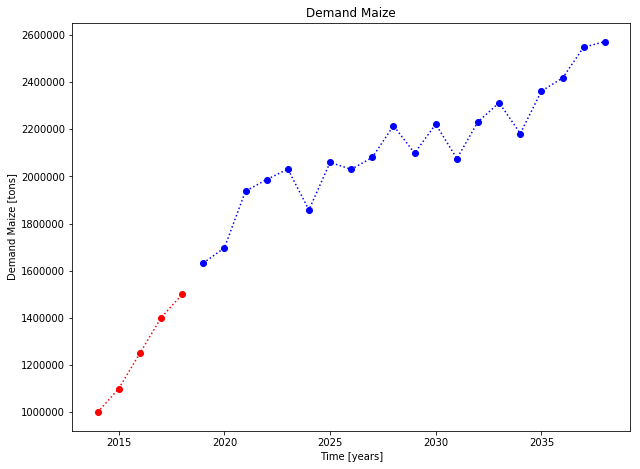

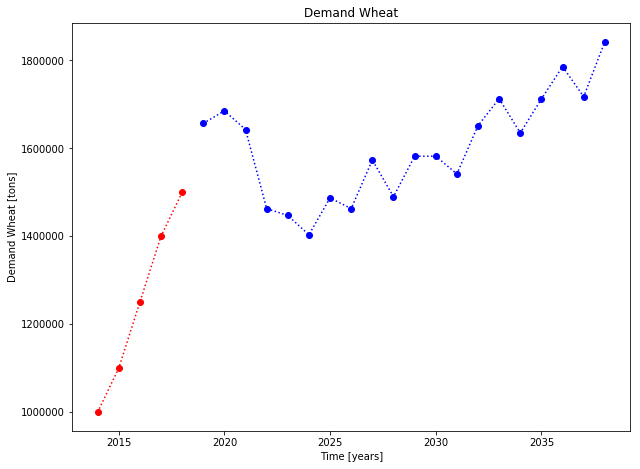

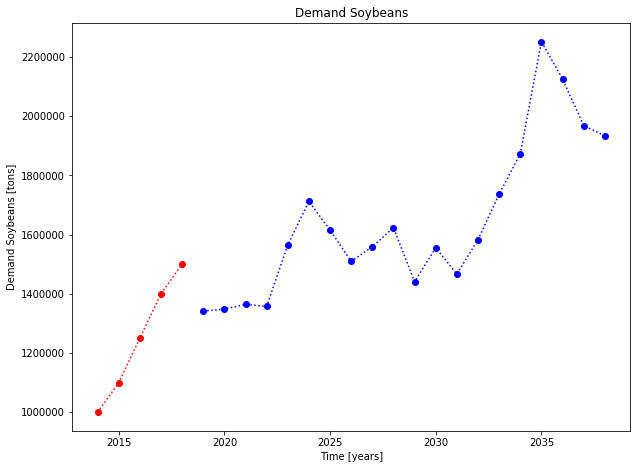

In [2]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [4]:
# instantiate System object
Terminal = system.System(elements = demand + vessels)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 99
     Handysize calls: 43
     Handymax calls: 30
     Panamax calls: 26
  Total cargo volume: 4630680
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 5.545456774555136
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.804459156508337
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.8907932838260706
  *** add Berth to elements
     Berth occupancy (after adding berth): 1.8907932838260706
  *** add Quay to elements
     Berth occupancy (after adding quay)

## Report all elements

In [6]:
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1632575
1   2020  1696825
2   2021  1937758
3   2022  1986579
4   2023  2031278
5   2024  1857872
6   2025  2059404
7   2026  2030028
8   2027  2080563
9   2028  2215146
10  2029  2098692
11  2030  2221486
12  2031  2075635
13  2032  2231734
14  2033  2312529
15  2034  2181836
16  2035  2361709
17  2036  2417421
18  2037  2547857
19  2038  2571464, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': '55e59f7a-4a11-11e9-864a-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1656739
1   2020  1685546
2   2021  1642959
3   2022  1463122
4   2023  1447526
5   2024  1403603
6   2025  1487518
7   2026  1463031
8   2027  1573718
9   2

19  2038        0    118536.25  118536.25  1160640.0  2160.0}

Mobile_crane_01

{'triggers': [], 'renevue': [], 'labour': 2160.0, 'maintenance': 118536.25, 'energy': 1160640.0, 'insurance': 38237.5, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 3823750, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 20, 'unit_rate': 3325000, 'mobilisation_perc': 0.15, 'maintenance_perc': 0.031, 'consumption': 310, 'insurance_perc': 0.01, 'crew': 3, 'crane_type': 'Mobile crane', 'lifting_capacity': 30, 'hourly_cycles': 25, 'eff_fact': 0.35, 'payload': 21, 'peak_capacity': 525, 'effective_capacity': 183, 'year_purchase': [], 'year_online': 2021, 'name': 'Mobile_crane_01', 'id': '566eec1c-4a11-11e9-9a79-60f677ba2ce0', 'df':     year    capex  maintenance  insurance     energy  labour
0   2019        0         0.00       0.00        0.0     0.0
1   2020  3823750    118536.25  118536.25  1160640.0  2160.0
2   2021        0    118536.25  118536.25  1160640.0  2160.0
3   2022      

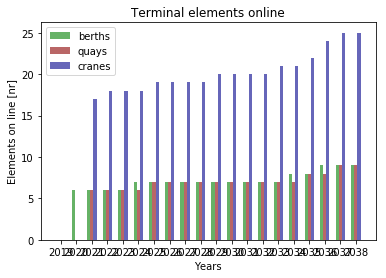

In [7]:
Terminal.terminal_elements_plot()

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [8]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [berth, screw],
         [crane, conveyor1],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)